$$ \frac{d f}{d x} = 2 \pi\cos{[2\pi x]}, \quad f(0)=0.5. $$

In [309]:
import numpy as np 
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn

device = "cuda" if torch.cuda.is_available() else "cpu"

torch.__version__

'1.10.1'

In [310]:
def samples(batch_size=100, n_inputs=1):     
    return torch.rand((batch_size, n_inputs))

In [311]:
mlp = nn.Sequential(
	nn.Linear(1, 8),
  	nn.Tanh(),
	nn.Linear(8, 4), 
	nn.Tanh(), 
	nn.Linear(4, 1)
)

mlp

Sequential(
  (0): Linear(in_features=1, out_features=8, bias=True)
  (1): Tanh()
  (2): Linear(in_features=8, out_features=4, bias=True)
  (3): Tanh()
  (4): Linear(in_features=4, out_features=1, bias=True)
)

In [312]:
N_STEPS = 5000
BATCH_SIZE = 100

optimizer = torch.optim.Adam(mlp.parameters(), lr=0.02)
criterion = torch.nn.MSELoss()

hist = []
log_each = 50
for step in range(1, N_STEPS):

    X = samples(BATCH_SIZE, 1)
    X.requires_grad_(True)
    
    # pde loss
    f = mlp(X)
    df_dx, = torch.autograd.grad(f, X, grad_outputs = torch.ones_like(X),create_graph=True)
    pde_loss = criterion(df_dx, 2*torch.pi*torch.cos(2*torch.pi*X))

    # boundary condition loss
    boundary_loss = criterion(mlp(torch.tensor([0.]).reshape(1,1)), torch.tensor([0.5]).reshape(1,1)) 
    
    # update
    optimizer.zero_grad()
    loss = pde_loss + boundary_loss
    loss.backward()
    optimizer.step()
   
    hist.append(loss.item())
    if step % log_each == 0:
        print(f'{step}/{N_STEPS} pde_loss {pde_loss.item():.5f} boundary_loss {boundary_loss.item():.5f}')

50/5000 pde_loss 5.22864 boundary_loss 0.05654
100/5000 pde_loss 0.08172 boundary_loss 0.00116
150/5000 pde_loss 0.02611 boundary_loss 0.00060
200/5000 pde_loss 0.02328 boundary_loss 0.00014
250/5000 pde_loss 0.01900 boundary_loss 0.00029
300/5000 pde_loss 0.02300 boundary_loss 0.00004
350/5000 pde_loss 0.01552 boundary_loss 0.00001
400/5000 pde_loss 0.01262 boundary_loss 0.00009
450/5000 pde_loss 0.00895 boundary_loss 0.00001
500/5000 pde_loss 0.01085 boundary_loss 0.00004
550/5000 pde_loss 0.00814 boundary_loss 0.00001
600/5000 pde_loss 0.00840 boundary_loss 0.00001
650/5000 pde_loss 0.00636 boundary_loss 0.00012
700/5000 pde_loss 0.00771 boundary_loss 0.00008
750/5000 pde_loss 0.00851 boundary_loss 0.00006
800/5000 pde_loss 0.00597 boundary_loss 0.00021
850/5000 pde_loss 0.00692 boundary_loss 0.00061
900/5000 pde_loss 0.00422 boundary_loss 0.00003
950/5000 pde_loss 0.00401 boundary_loss 0.00003
1000/5000 pde_loss 0.00420 boundary_loss 0.00000
1050/5000 pde_loss 0.01104 boundary_loss

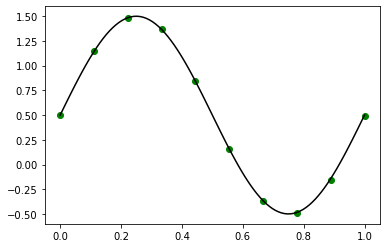

In [313]:
y= mlp(torch.linspace(0,1,10).reshape(-1,1)).detach().numpy().reshape(-1)
plt.scatter(np.linspace(0,1,10), y , c='green')
# actual solution
plt.plot(np.linspace(0,1,100), np.sin(2 * np.pi * np.linspace(0,1,100)) + 0.5, c='black')